In [1]:
library(FactoMineR)
library(dummies)
library(factoextra)

dummies-1.5.6 provided by Decision Patterns

Loading required package: ggplot2


In [2]:
family <- function(fams) {
    function(fam) {
        if (fam %in% fams) as.character(fam) else 'other'
    }
}

## Best Silhouette
 - 5 long group covering 217 languages
 - quality index: 5.16
 - dim1: 25%
 - dim2: 18%
 - fields: 'phonology': 5
 - features:
 - 12A Syllable Structure
 - 13A Tone
 - 18A Absence of Common Consonants
 - 7A Glottalized Consonants
 - 9A The Velar Nasal
 - family1: 15 (Austronesian), 
 - family2: 12 (Indo-European), 
 - separation: 0.71


In [3]:
bestsil <- read.csv("chunked-feature-sets/12A-13A-18A-7A-9A-217.csv")
bestsil$family <-  as.factor(sapply(bestsil$family,family(c('Austronesian','Indo-European')))) 
marked_families = which(bestsil$family %in% c('Austronesian','Indo-European'))
mca1 = MCA(bestsil,quali.sup=1:11)

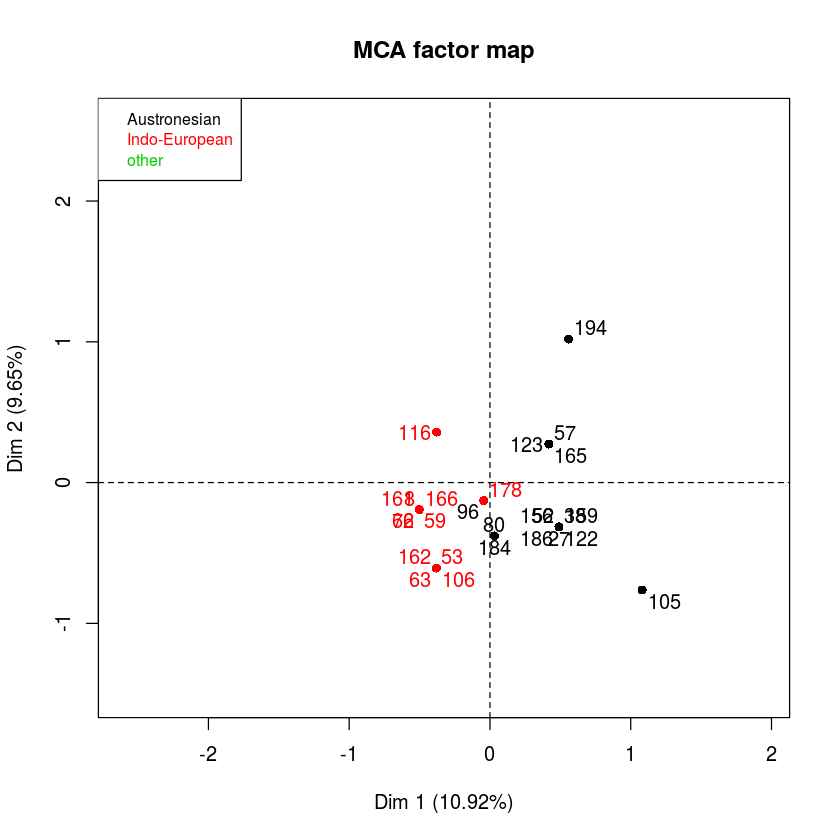

In [4]:
plot(mca1,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=marked_families,unselect=1)

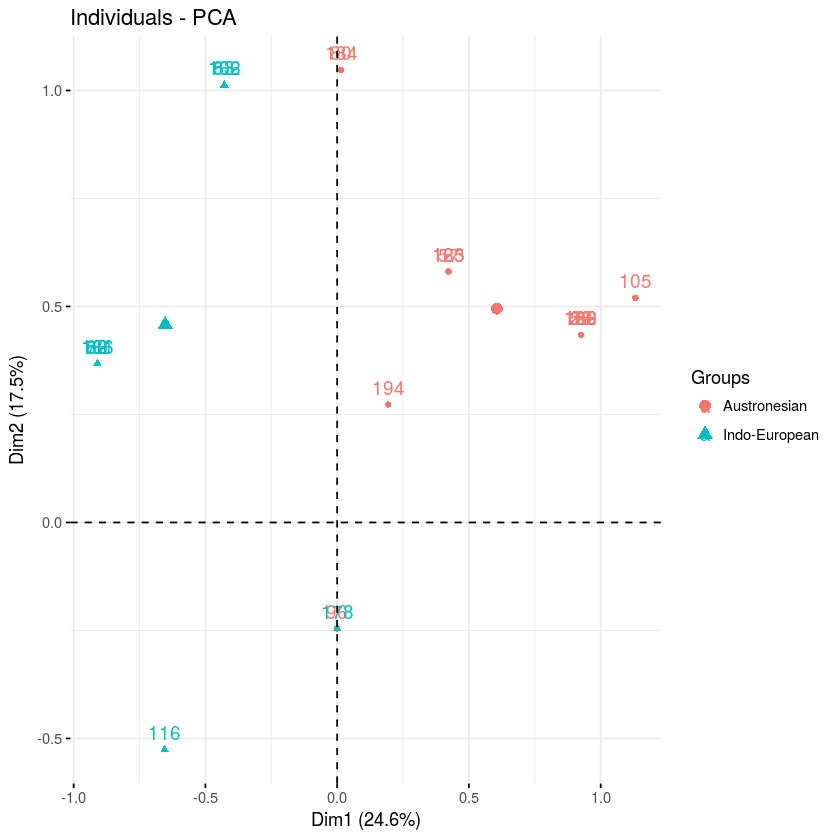

In [5]:
dbest <- bestsil[,1:11]
for(f in c('X12A','X13A','X18A','X7A','X9A')) {
   dbest <- cbind(dbest,dummy(as.factor(bestsil[[f]])))
}
pca1 <- princomp(dbest[,12:dim(dbest)[2]],scores=TRUE)
ind <- get_pca_ind(pca1)
fviz_pca_ind(pca1, habillage = as.factor(dbest$family),select.ind=list(name=marked_families))

In [6]:
twopcs <- read.csv("chunked-feature-sets/12A-13A-4A-5A-7A-9A-217.csv")
twopcs$family <-  as.factor(sapply(twopcs$family,family(c('Austronesian','Afro-Asiatic')))) 
marked_families = which(twopcs$family %in% c('Austronesian','Afro-Asiatic'))
mca2 = MCA(twopcs,quali.sup=1:11)

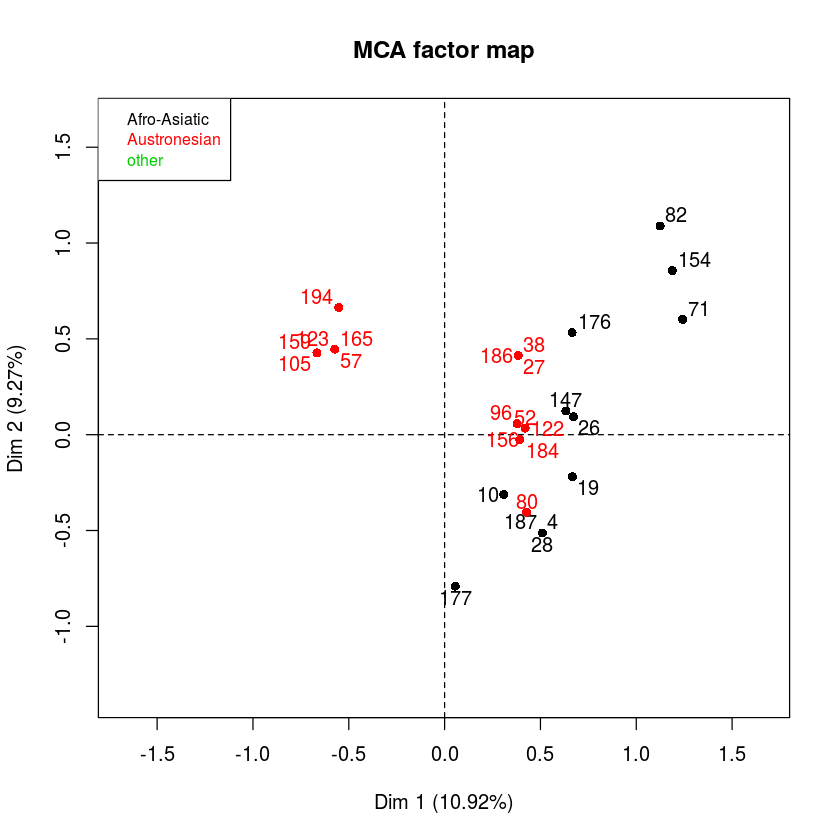

In [7]:
plot(mca2,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=marked_families,unselect=1)

'9A':  
 - comp.0    0.006422 
 - comp.1    0.357890 
 - comp.2    0.369531
 - comp.3    0.117446 
 - comp.4    0.107525 

'12A':
 - comp.0    0.028325
 - comp.1    0.399011
 - comp.2    0.145066
 - comp.3    0.158742
 - comp.4    0.319193

'7A': 
 - comp.0    0.004959
 - comp.1    0.080602
 - comp.2    0.086006
 - comp.3    0.023605
 - comp.4    0.002807

'4A': 
 - comp.0    0.409921
 - comp.1    0.086097
 - comp.2    0.036933
 - comp.3    0.247099
 - comp.4    0.520156

'13A': 
 - comp.0    0.012447
 - comp.1    0.059364
 - comp.2    0.337842
 - comp.3    0.429019
 - comp.4    0.013910

'5A': 
 - comp.0    0.537927
 - comp.1    0.017037
 - comp.2    0.024621
 - comp.3    0.024090
 - comp.4    0.036408

In [8]:
mca2$var$eta2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
X12A,0.012096573,0.4754561,0.04794653,0.41055625,5.782743e-05
X13A,0.087821676,0.2579313,0.16091712,0.03298019,8.053253e-02
X4A,0.877698214,0.2435463,0.05957350,0.07182458,2.869321e-01
X5A,0.872848289,0.1540656,0.35045675,0.30850538,3.956467e-01
X7A,0.219897254,0.2671551,0.41949050,0.52782405,3.577278e-01
X9A,0.004460625,0.3637156,0.49072837,0.01179548,1.839487e-01


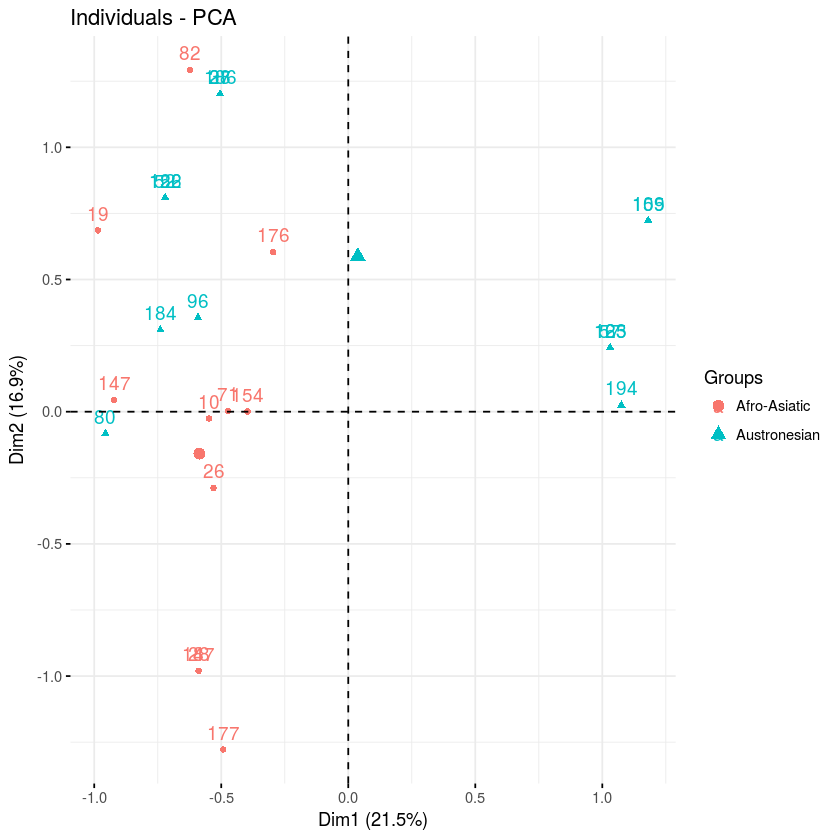

In [9]:
dtwo <- twopcs[,1:11]
for(f in c('X12A','X13A','X4A','X5A','X7A','X9A')) {
   dtwo <- cbind(dtwo,dummy(as.factor(twopcs[[f]])))
}
pca2 <- princomp(dtwo[,12:dim(dtwo)[2]],scores=TRUE)
ind <- get_pca_ind(pca2)
fviz_pca_ind(pca2, habillage = as.factor(dtwo$family),select.ind=list(name=marked_families))

### worst silhouette
 - 6 long group covering 201 languages
 - quality index: 7.70
 - dim1: 23%
 - dim2: 10%
 - fields: 'phonology': 6
 - features:
 - 14A Fixed Stress Locations
 - 15A Weight-Sensitive Stress
 - 16A Weight Factors in Weight-Sensitive Stress Systems
 - 1A Consonant Inventories
 - 6A Uvular Consonants
 - 8A Lateral Consonants
 - family1: 25 (Austronesian), 
 - family2: 21 (Indo-European), 
 - separation: 0.14


In [12]:
worst <- read.csv("chunked-feature-sets/14A-15A-16A-1A-6A-8A-201.csv")
worst$family <-  as.factor(sapply(worst$family,family(c('Austronesian','Indo-European'))))
marked_families = which(worst$family %in% c('Austronesian','Indo-European'))
mca2 = MCA(worst,quali.sup=1:11)
dworst <- worst[,1:11]
for(f in c('X14A','X15A','X16A','X1A','X6A','X8A')) {
   dworst <- cbind(dworst,dummy(as.factor(worst[[f]])))
}
pca3 <- princomp(dworst[,12:dim(dworst)[2]],scores=TRUE)
ind <- get_pca_ind(pca3)
fviz_pca_ind(pca3, habillage = as.factor(dworst$family),select.ind=list(name=marked_families))

ERROR: Error in dimnames(res) <- list(attributes(tab)$row.names, listModa): length of 'dimnames' [2] not equal to array extent


### Mediocre
 - 6 long group covering 201 languages
 - quality index: 5.77
 - dim1: 19%
 - dim2: 13%
 - fields: 'phonology': 6
 - features:
 - 14A Fixed Stress Locations
 - 16A Weight Factors in Weight-Sensitive Stress Systems
 - 18A Absence of Common Consonants
 - 1A Consonant Inventories
 - 5A Voicing and Gaps in Plosive Systems
 - 6A Uvular Consonants
 - family1: 25 (Austronesian), 
 - family2: 21 (Indo-European), 
 - separation: 0.27

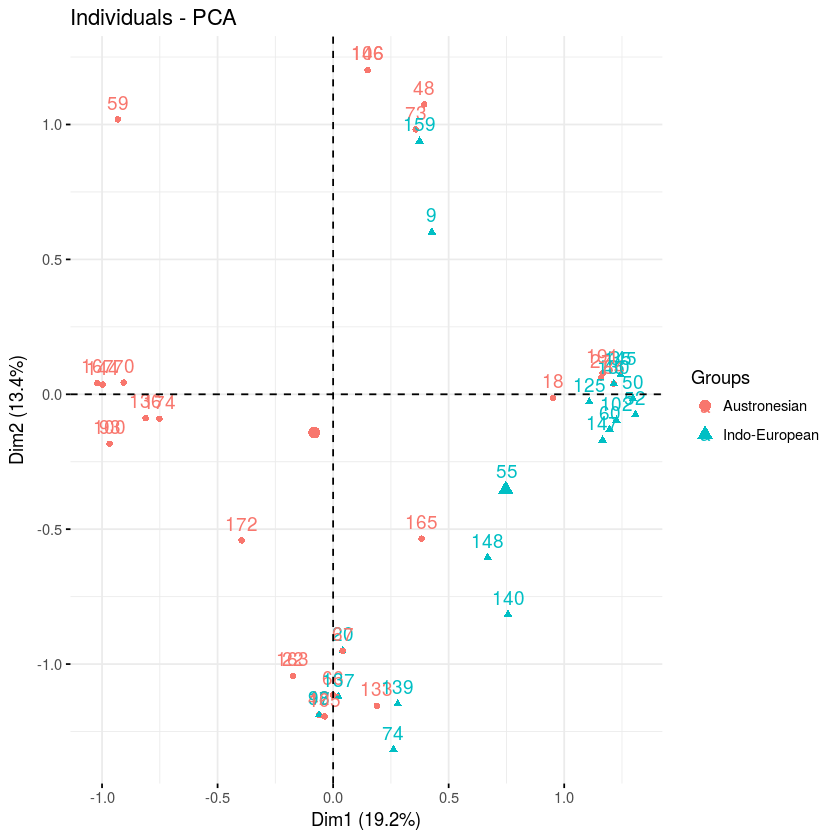

In [20]:
mid <- read.csv("chunked-feature-sets/14A-16A-18A-1A-5A-6A-201.csv")
mid$family <-as.factor(sapply(mid$family,family(c('Austronesian','Indo-European')))) 
marked_families = which(mid$family %in% c('Austronesian','Indo-European'))
dmid <- mid[,1:11]
for(f in c('X14A','X16A','X18A','X1A','X5A','X6A')) {
   dmid <- cbind(dmid,dummy(as.factor(mid[[f]])))
}
pca4 <- princomp(dmid[,12:dim(dmid)[2]],scores=TRUE)
ind <- get_pca_ind(pca4)
fviz_pca_ind(pca4, habillage = as.factor(dmid$family),select.ind=list(name=marked_families))